## Biodiversity

*Project Scoping*\
Scoping helps to create structure before we begin the entire project. The scoping process is fairly iterative and the scope gets refined both during the scoping process as well as during the project.

*0. Understand the problem*\
First, we need to make sure we understand the **problem** and its **impact**.
We want to understand whether the US parks have endangerment problem, how many are affected and what is the magnitude.

*1. Project Goals*\
We are going to explore and visually examine the datasets. Hopefully from the data at hand we can find some ingsights for questions such as:
- Does species diversity follow any patterns? What is the distribution of `conservation_status` for animals?
- How many species are there? Which species spotted the most at each park?
- Where is the biodiversity hotspot located?
- What's the rarest species? Are there certain types of species more likely to be endangered?
- Are there differences between species and their conservation status significant?

*2. Data*\
This project uses two datasets: `observations.csv` and `sepecies_info.csv`. 

The `observations` 
- `scientific_name`: names are used to universally identify and name an organism
- `park_name`: park where the species found
- `observations`: number of times each species was observed at park

and `species_info` provides the information of:
- `category`: animal classifications (fish, amphibi, reptile, mammal, bird)
- `scientific_name`: names are used to universally identify and name an organism
- `common_name`: name that is based on the normal language of everyday life
- `conservation_status`: category assigned to a species to reflect its risk of extinction

*3. Analysis*\
We apply some of statistical techniques and create visualization in order to: 
- Perform descriptive analysis to summarize and describe the data 
- Detect events (e.g relationship between species) and anomalies that are currently happening
- Perform inferential analysis to draw conclusions and make predictions based on sample data.

*4. Evaluation*\
We wrap up the project and write conclusion(s) about overall process and key findings and takeaways.

### Import the relevant packages

In [102]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, chi2_contingency

#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

## Load the data
We are loading CSV files and assign them to pandas dataframes.


In [103]:
obs = pd.read_csv('observations.csv')
info = pd.read_csv('species_info.csv')
info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [104]:
info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


**Note**: Notice that parks names always end with 'National Park' which takes up unnecessary space so we will remove them.

In [105]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [106]:
# delete 'national park'
obs.park_name = obs['park_name'].str.replace('national park', '', case=False)

What are the `conservation_status` present in the data?

In [107]:
print(info.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


**Note**: We assume `NaN` values to likely assigned to species that is not endangered, for this project we replace them with `Low Risk` status.

In [108]:
# replace 'nan' with 'low risk'
info.conservation_status[info.conservation_status.isna()] = 'Low Risk'

Check if there are any duplicate data and eliminate them

In [109]:
print(f'We have {len(obs)} row data')

We have 23296 row data


In [112]:
# check for duplicate info data
duplicates_info = info.scientific_name.duplicated()
print(f'There are {duplicates_info.value_counts()[1]} duplicated species_info row')


There are 283 duplicated species_info row


It appears that there is an excessive amount of duplicated species_info data based on the species name. We need to conduct a more thorough examination to figure out the cause.

In [113]:
duplicates_info2 = info[info.duplicated(subset=['scientific_name'],keep=False)]
duplicates_info2.sort_values(by=['scientific_name'])

,category,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",Low Risk
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,Low Risk
2134,Vascular Plant,Agrostis gigantea,Redtop,Low Risk
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",Low Risk
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",Low Risk
2136,Vascular Plant,Agrostis mertensii,Northern Agrostis,Low Risk
2138,Vascular Plant,Agrostis scabra,"Rough Bentgrass, Rough Hairgrass",Low Risk
5556,Vascular Plant,Agrostis scabra,"Rough Bent, Rough Bentgrass, Ticklegrass",Low Risk
4182,Vascular Plant,Agrostis stolonifera,"Carpet Bentgrass, Creeping Bent, Creeping Bent...",Low Risk
2139,Vascular Plant,Agrostis stolonifera,Creeping Bentgrass,Low Risk


In [114]:
# Canis lupus before drop data
z = info[info['scientific_name'] == 'Canis lupus']
z

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


It seems that we have two different duplication cases: one based on exact match of the entire scientific name, and the other due to only having similarity in one word. For example, 'Oncorhynchus mykiss' is classified as both 'Low Risk' and 'Threatened'. We are considering it is more important to retain data where the `conservation_status` of species is sorted by the **higher** risk level in the data. Based on the example, we are going to keep 'Oncorhynchus mykiss' as 'Threatened' species.

In [115]:
info.conservation_status.unique()

array(['Low Risk', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [116]:
# sort conservation status based on level of endangerment
info.conservation_status = pd.Categorical(info.conservation_status, 
                                          categories=['Low Risk', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'], 
                                          ordered=True)

In [117]:
duplicates_info3 = info[info.duplicated(subset=['scientific_name'], keep=False)]
duplicates_info3.sort_values(by=['scientific_name', 'conservation_status'])

,category,scientific_name,common_names,conservation_status
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,Low Risk
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",Low Risk
2134,Vascular Plant,Agrostis gigantea,Redtop,Low Risk
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",Low Risk
2136,Vascular Plant,Agrostis mertensii,Northern Agrostis,Low Risk
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",Low Risk
2138,Vascular Plant,Agrostis scabra,"Rough Bentgrass, Rough Hairgrass",Low Risk
5556,Vascular Plant,Agrostis scabra,"Rough Bent, Rough Bentgrass, Ticklegrass",Low Risk
2139,Vascular Plant,Agrostis stolonifera,Creeping Bentgrass,Low Risk
4182,Vascular Plant,Agrostis stolonifera,"Carpet Bentgrass, Creeping Bent, Creeping Bent...",Low Risk


In [118]:
# drop duplicates 
info.drop_duplicates(inplace=True, subset=['scientific_name'], keep='last')
info.reset_index(drop=True, inplace=True)

In [119]:
# Canis lupus after drop data
x = info[info['scientific_name'] == 'Canis lupus']
x

,category,scientific_name,common_names,conservation_status
4165,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


We can merge `obs` and `info` into a single dataframe `df` so it is easier to investigate some relationships within the data.

In [120]:
# left join observation with species_info dataframe
df = pd.merge(obs, info, how='left')
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Low Risk
1,Neovison vison,Great Smoky Mountains,77,Mammal,American Mink,Low Risk
2,Prunus subcordata,Yosemite,138,Vascular Plant,Klamath Plum,Low Risk
3,Abutilon theophrasti,Bryce,84,Vascular Plant,Velvetleaf,Low Risk
4,Githopsis specularioides,Great Smoky Mountains,85,Vascular Plant,Common Bluecup,Low Risk


In [121]:
print(f'There were {len(df)} df row')
duplicates_df = df.scientific_name.duplicated()
df = df.drop_duplicates()
print(f'Now we have {len(df)} row data')

There were 23296 df row
Now we have 23281 row data


## Analysis

### Does species diversity follow any patterns? What is the distribution of `conservation_status` for animals?

In [122]:
# number of observations per category
obs_category = df.pivot_table(index='category', values='observations', aggfunc='sum')
obs_category.sort_values(by='observations', ascending=False)

,observations
category,
Vascular Plant,2553291
Bird,292578
Nonvascular Plant,190653
Mammal,116440
Fish,70818
Reptile,44678
Amphibian,43971


In [123]:
# number of unique species per category
species_category = df.groupby('category')['scientific_name'].nunique().reset_index()
species_category.sort_values(by='scientific_name', ascending=False)

,category,scientific_name
6,Vascular Plant,4262
1,Bird,488
4,Nonvascular Plant,333
3,Mammal,176
2,Fish,125
0,Amphibian,79
5,Reptile,78


Based on the data, we have seven categories broadly divided into Plants: Vascular and Nonvascular; and Animals: Mammal, Bird, Amphibian, Reptile, Fish. Highest number of species observed was vascular plant. While from animal group, birds are the most abundant.

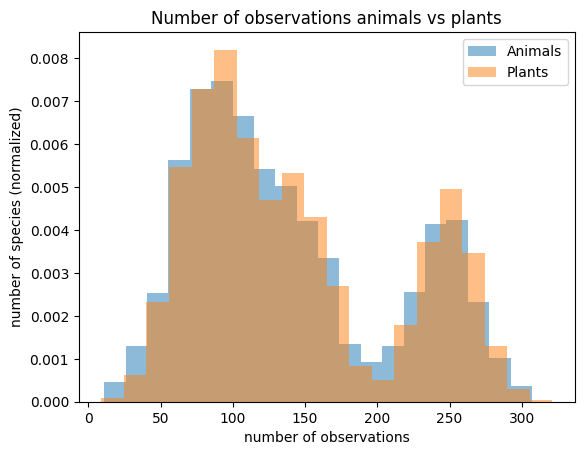

<Figure size 640x480 with 0 Axes>

In [124]:
# histogram number of observations per species based on plants and animals category
category_map = {
    'Vascular Plant': 'Plants',
    'Nonvascular Plant': 'Plants',
    'Mammal': 'Animals',
    'Bird': 'Animals',
    'Amphibian': 'Animals',
    'Reptile': 'Animals',
    'Fish': 'Animals'
}
df['general_category'] = df['category'].map(category_map)

plt.hist(df.observations[df.general_category=='Animals'], bins=20, label='Animals', density=True, alpha=.5)
plt.hist(df.observations[df.general_category=='Plants'], bins=20, label='Plants', density=True, alpha=.5)
plt.legend(loc='upper right')
plt.title('Number of observations animals vs plants')
plt.xlabel('number of observations')
plt.ylabel('number of species (normalized)')
plt.show()
plt.clf()

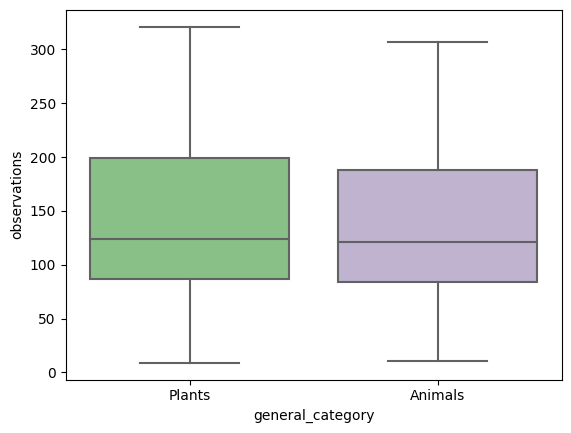

In [125]:
# boxplot comparison between plant and animal
sns.boxplot(x='general_category', y='observations', data=df, palette='Accent')

plt.show()

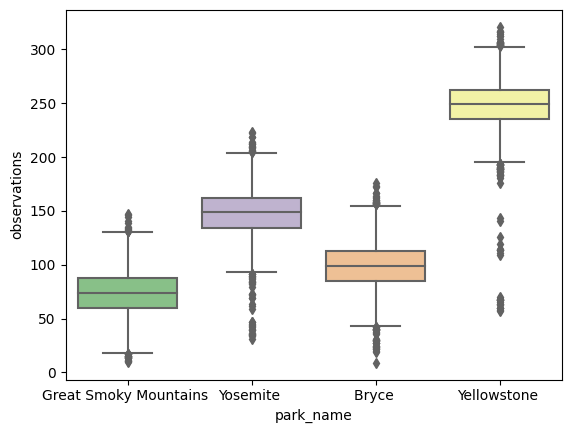

In [126]:
# boxplot comparison between park name and number of observation
sns.boxplot(x='park_name', y='observations', data=df, palette='Accent')
plt.show()

The histogram shows two peaks which indicate that the data has two different modes or patterns of behavior. This can often be interpreted as two separate subpopulations with distinct characteristics within the overall dataset.
Moreover, the boxplot does not show a significant difference in central tendency (median) as well as identified outliers between the two. The presence of a bimodal distribution can be attributed to **an uneven distribution of samples from each park**, with Yellowstone data showing a notably higher value compared to the rest.

### Relationship between conservation status and species

We create contingency table to help determine if the general category and conservation status category are related. First find out how many species are in each conservation status category.

In [127]:
# number of each conservation status
df['conservation_status'].value_counts()

conservation_status
Low Risk              22513
Species of Concern      644
Endangered               68
Threatened               44
In Recovery              12
Name: count, dtype: int64

In [128]:
pivot_df_gen_cat = df.pivot_table(index='general_category', columns='conservation_status', values='scientific_name', aggfunc='count')
pivot_df_gen_cat

conservation_status,Low Risk,Species of Concern,In Recovery,Threatened,Endangered
general_category,,,,,
Animals,3518,452,12,36,64
Plants,18995,192,0,8,4


We notice that **the vast majority of species are not at risk**. Since 'Low Risk' takes large proportion of the dataset, we omit 'Low Risk' to avoid obscuring the rest of the data.

In [129]:
# proportion of protected organism
df_endangered = df[df.conservation_status != 'Low Risk']

freq_endangered = pd.crosstab(df_endangered.general_category, df_endangered.conservation_status)
prop_endangered = freq_endangered/len(df_endangered)*100
round(prop_endangered, 2)

conservation_status,Species of Concern,In Recovery,Threatened,Endangered
general_category,,,,
Animals,58.85,1.56,4.69,8.33
Plants,25.00,0.00,1.04,0.52


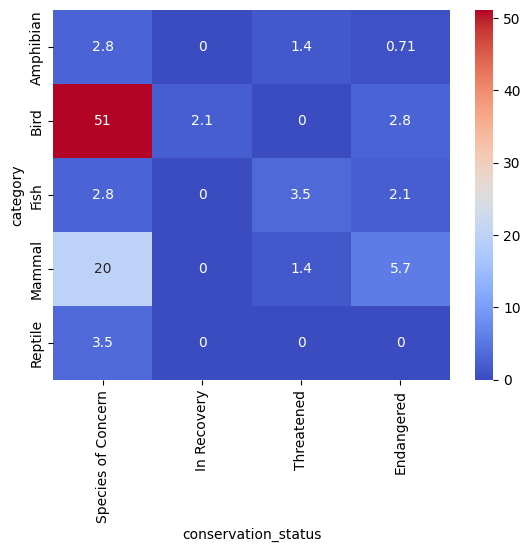

In [130]:
# proportion of protected animals
animals = df_endangered[df_endangered.general_category == 'Animals']

freq_endangered_cat = pd.crosstab(animals.category, animals.conservation_status)
prop_endangered_cat = freq_endangered_cat/len(animals)*100


sns.heatmap(prop_endangered_cat, annot=True, cmap='coolwarm')
plt.show()

In [131]:
freq_endangered_cat

conservation_status,Species of Concern,In Recovery,Threatened,Endangered
category,,,,
Amphibian,16,0,8,4
Bird,288,12,0,16
Fish,16,0,20,12
Mammal,112,0,8,32
Reptile,20,0,0,0


In [132]:
round(prop_endangered_cat, 2)

conservation_status,Species of Concern,In Recovery,Threatened,Endangered
category,,,,
Amphibian,2.84,0.00,1.42,0.71
Bird,51.06,2.13,0.00,2.84
Fish,2.84,0.00,3.55,2.13
Mammal,19.86,0.00,1.42,5.67
Reptile,3.55,0.00,0.00,0.00


In [133]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(freq_endangered_cat)
print(np.round(expected))

chi2, pval, dof, expected = chi2_contingency(freq_endangered_cat)

print(chi2)
print(pval)

[[ 22.   1.   2.   3.]
 [253.   7.  20.  36.]
 [ 38.   1.   3.   5.]
 [122.   3.  10.  17.]
 [ 16.   0.   1.   2.]]
201.87500130432312
1.337566014051672e-36


- The need for conservation is more pronounced among animals, with particular emphasis on **birds and mammals**, which highest percentage classified as both `Species of Concern` and `Endangered`
- High chi square value and p-value significantly smaller than alpha (p<0.05) indicate a strong association between animal category and its conservation status

#### Are there certain types of species more likely to be endangered?

In order to anser this question, we need to create a table to compare protected and non protected species

In [134]:
df['is_protected'] = df.conservation_status != 'Low Risk'

protected_counts = df.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()

protected_counts.columns = ['category', 'not_protected', 'protected']

protected_counts['% of protected species'] = (protected_counts.protected/ \
                                (protected_counts.protected + protected_counts.not_protected) * 100).round(2)

protected_counts

,category,not_protected,protected,% of protected species
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,114,11,8.80
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


The result is aligned with previous analysis where bird and mammal is more likely to be in need of protection 

### How many species are there? Which species spotted the most at each park? Which is the least?

In [135]:
print(f'There are {df.scientific_name.nunique()} unique species in the dataset')

There are 5541 unique species in the dataset


In [136]:
print(f'There are {len(df_endangered.scientific_name.unique())} unique protected species')

There are 179 unique protected species


In [137]:
# find most observed species within each park
y = df.groupby(['park_name', 'scientific_name', 'common_names', 'category', 'general_category'])['observations'].max().reset_index()\
                                                                          .sort_values(by='observations', ascending=False)

y.groupby('park_name').first()

,scientific_name,common_names,category,general_category,observations
park_name,,,,,
Bryce,Valerianella radiata,"Beaked Corn-Salad, Corn Salad",Vascular Plant,Plants,176
Great Smoky Mountains,Sonchus asper ssp. asper,Spiny Sowthistle,Vascular Plant,Plants,147
Yellowstone,Lycopodium tristachyum,"Deep-Root Clubmoss, Ground Cedar",Vascular Plant,Plants,321
Yosemite,Ivesia shockleyi var. shockleyi,"Shockley's Ivesia, Sky Mousetail",Vascular Plant,Plants,223


In [138]:
# most observed animal species within each park
z = y[y['general_category'] == 'Animals']

z.groupby('park_name').first()

,scientific_name,common_names,category,general_category,observations
park_name,,,,,
Bryce,Martes americana,"American Marten, Marten",Mammal,Animals,167
Great Smoky Mountains,Branta hutchinsii,Cackling Goose,Bird,Animals,139
Yellowstone,Chrysemys picta bellii,Western Painted Turtle,Reptile,Animals,307
Yosemite,Calidris canutus,Red Knot,Bird,Animals,207


In [139]:
y.groupby('park_name').last()

,scientific_name,common_names,category,general_category,observations
park_name,,,,,
Bryce,Corydalis aurea,"Golden Corydalis, Scrambled Eggs",Vascular Plant,Plants,9
Great Smoky Mountains,Collomia tinctoria,"Staining Collomia, Yellowstain Collomia",Vascular Plant,Plants,10
Yellowstone,Grus americana,Whooping Crane,Bird,Animals,57
Yosemite,Noturus baileyi,Smoky Madtom,Fish,Animals,31


In [140]:
z.groupby('park_name').last()

,scientific_name,common_names,category,general_category,observations
park_name,,,,,
Bryce,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Bird,Animals,20
Great Smoky Mountains,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Amphibian,Animals,11
Yellowstone,Grus americana,Whooping Crane,Bird,Animals,57
Yosemite,Noturus baileyi,Smoky Madtom,Fish,Animals,31


- Most observed species in all four national parks belong to the category of vascular plant. 
- Most frequently observed animal in the parks vary among bird, mammal, and reptile. 
- Most spotted species in Bryce park is `Deep-Root Clubmoss or Ground Cedar`
- Most spotted animal is `Western Painted Turtle`.
- Least spotted or the rarest species is `Golden Corydalis or Scrambled Eggs`
- Least spotted or the rarest animal is `Sierra Nevada Yellow-Legged Frog`

#### is there an association between conservation status and park?

In [148]:
freq_endangered_park = df.pivot_table(values='scientific_name', index='conservation_status', columns='park_name', aggfunc=lambda x: len(x.unique()))
freq_endangered_park

park_name,Bryce,Great Smoky Mountains,Yellowstone,Yosemite
conservation_status,,,,
Low Risk,5362,5362,5362,5362
Species of Concern,151,151,151,151
In Recovery,3,3,3,3
Threatened,10,10,10,10
Endangered,15,15,15,15


In [149]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(freq_endangered_park)
print(np.round(expected))

chi2, pval, dof, expected = chi2_contingency(freq_endangered_park)
pval

[[5362. 5362. 5362. 5362.]
 [ 151.  151.  151.  151.]
 [   3.    3.    3.    3.]
 [  10.   10.   10.   10.]
 [  15.   15.   15.   15.]]


1.0

All species are found in each of the national parks, hence there are **no association** between conservation_status and park_name (pval = 1).\
This also implies that there are no areas of biodiversity hotspot among the parks in this particular dataset.

### Are there certain types of species more likely to be endangered?

For this question, we want to look at the reccurance of words in `common_names`. More repeated names is belong to one type of species. Since we interested in endangered animals we are going to use `df_endangered` which exclude 'Low Risk' status.

In [ ]:
# create a list top 20 of words within common names
txt = df_endangered.common_names.str.replace(',', '').str.split().explode().value_counts()
txt.head(20)

common_names
Myotis           80
Bat              64
Northern         44
Brown            36
Mountain         28
Wolf             28
Western          24
American         20
Great            20
California       20
Warbler          16
Silver-Haired    16
Big              16
Sierra           16
Nevada           16
Gray             16
Sand             16
Common           16
Sparrow          16
Osprey           16
Name: count, dtype: int64

We gather that these subgroups of species are highly likely to be classified as protected animals:
- bats
- wolves
- warblers
- sparrows
- ospreys

Note that the five animals mentioned above belong to the classes of mammals and birds.

## Evaluation

We performed exploratory data analysis on the `observations` and `species_info` dataset to get a better picture of its variables and characteristics. We notice that the dataset may not be representative of the population. An example of some potential bias here is an uneven distribution of samples from each park, with Yellowstone data showing a notably higher observations for each of the species value compared to the rest. It is important to consider these potential sources of bias when using the dataset for research and other applications. 
- Most observed species in all four national parks belong to the category of vascular plant. 
- Most frequently observed animal in the parks vary among birds, mammals, and reptiles. 
- Among the animal groups, birds exhibit a large number of distinct species. Yet the percentage requiring conservation is substantial, in which followed by mammal.
- Subgroups of species are highly likely to be classified as protected animals are: bats, wolves, warblers, sparrows, ospreys
